# Prediction of Patient Risk Level Based on Vital Situation

With the number of medical cases increasing these days, Doctors and scientists alike have turned to machine learning (ML) techniques to develop screening tools and this is because of their superiority in pattern recognition and classification as compared to other traditional statistical approaches.

There is much difficulty in identifying high risk patients because of the multi-factorial nature of several contributory risk factors such as diabetes, high blood pressure, high cholesterol et cetera. Due to such constraints, scientists have turned towards modern approaches like Data Mining and Machine Learning for predicting the disease.

This prediction helps in identifying if a patient’s health risk is based on his/her medical recordings such as blood pressure levels, pulse rate, oxygen levels and more

# Dataset:
The data set provides the patients’ information which includes over 12,00,000+ records and 7+ attributes. Each attribute is a potential risk factor and they include various Information on current medical condition centred date wise.

• blood_pressure_average

• blood_pressure_systolic

• blood_pressure_diastolic

• heart_rate

• respiration_over_impedence

• spirometry_oxygen_saturation

• pulse

# Models:
<b>K-nearest neighbor</b>-predict the features of a data point based on the features of its neighbors

<b>Naive Bayes Classifie</b>-a collection of classification algorithms based on Bayes' Theorem

<b>Decision Tree</b>-creates a decision tree based on which, it assigns the class values to each data point

# Language:
This prediction is implemented in <b>Python</b> and different its classification algorithms. Python is a high-level, object-oriented programming language with dynamic building options and fast development cycles. However, many may not know that it's also one of the safest programming languages with useful applications in healthcare.

# Target variable to predict:
The <b>“Coded”</b> indicates the actual result whether the patient is at risk or not. This variable can hold binary values “1” and “2” where binary: “1”, means “There is a risk” and “0” means “There is no risk”. This is the value to be predicted by the machine learning model.

# Import libraries
Python code in one module gains access to the code in another module by the process of importing it. Let's include some basic libaries first.

• <b>Pandas</b>-data manipulation and analysis

• <b>Numpy</b>- working with arrays

• <b>Seaborn</b>- data visualization library based on matplotlib

• <b>Matplotlib</b>- 2D plots of arrays

• <b>sklearn.neighbors</b>- Classifier implementing the k-nearest neighbors vote

• <b>sklearn.tree- Classifier</b> implementing the Desicion tree model

• <b>sklearn.ensemble</b>-averaging algorithms based on randomized decision trees

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sbn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn.metrics import roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

# Import dataset
Now that we have all the libraries we will need, we can import the dataset and take a look at it. The dataset is stored in the <b>training_frame.csv</b> file for training the models and <b>test_frame.csv</b> for testing the algorithms I'll use the pandas read_csv method to read the dataset.

In [2]:
training_df = pd.read_csv("training_frame.csv")
testing_df = pd.read_csv("test_frame.csv")

In [3]:
training_df.info()
testing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   sn                            100000 non-null  int64 
 1   date                          100000 non-null  object
 2   time                          100000 non-null  object
 3   heart_rate                    100000 non-null  int64 
 4   respiration_over_impedence    100000 non-null  int64 
 5   spirometry_oxygen_saturation  100000 non-null  int64 
 6   pulse                         100000 non-null  int64 
 7   blood_pressure_systolic       100000 non-null  int64 
 8   blood_pressure_diastolic      100000 non-null  int64 
 9   blood_pressure_average        100000 non-null  int64 
 10  patient_id                    100000 non-null  int64 
 11  machine_id                    100000 non-null  object
 12  Coded                         100000 non-null  int64 
dtype

Since ID cannot be used for classification we can drop the column

In [4]:

training_df.drop('sn',axis=1,inplace=True)
training_df.drop('time',axis=1,inplace=True)
training_df.drop('machine_id',axis=1,inplace=True)
testing_df.drop('machine_id',axis=1,inplace=True)
testing_df.drop('time',axis=1,inplace=True)
testing_df.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
len(training_df)

100000

In [6]:
len(testing_df)

100000

In [7]:
training_df['new_date'] = pd.to_datetime(training_df['date'], format='%d-%M-%Y')
testing_df['new_date'] = pd.to_datetime(testing_df['date'], format='%d-%M-%Y')
training_df['date'] = training_df['new_date']
testing_df['date'] = testing_df['new_date']
training_df.info()
testing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   date                          100000 non-null  datetime64[ns]
 1   heart_rate                    100000 non-null  int64         
 2   respiration_over_impedence    100000 non-null  int64         
 3   spirometry_oxygen_saturation  100000 non-null  int64         
 4   pulse                         100000 non-null  int64         
 5   blood_pressure_systolic       100000 non-null  int64         
 6   blood_pressure_diastolic      100000 non-null  int64         
 7   blood_pressure_average        100000 non-null  int64         
 8   patient_id                    100000 non-null  int64         
 9   Coded                         100000 non-null  int64         
 10  new_date                      100000 non-null  datetime64[ns]
dtypes: datetime64[

Since we cannot use date data for classification, we will convert it into an ordinal value for classification purpose

In [8]:

import datetime as dt
training_df['date_ord']=training_df['date'].map(dt.datetime.toordinal)
testing_df['date_ord']=testing_df['date'].map(dt.datetime.toordinal)

Let's now Check for any null values in the dataset

In [9]:

training_df.isnull().any()

date                            False
heart_rate                      False
respiration_over_impedence      False
spirometry_oxygen_saturation    False
pulse                           False
blood_pressure_systolic         False
blood_pressure_diastolic        False
blood_pressure_average          False
patient_id                      False
Coded                           False
new_date                        False
date_ord                        False
dtype: bool

In [10]:
testing_df.isnull().any()

date                            False
heart_rate                      False
respiration_over_impedence      False
spirometry_oxygen_saturation    False
pulse                           False
blood_pressure_systolic         False
blood_pressure_diastolic        False
blood_pressure_average          False
patient_id                      False
Coded                           False
new_date                        False
date_ord                        False
dtype: bool

In [11]:
training_df.describe()

,heart_rate,respiration_over_impedence,spirometry_oxygen_saturation,pulse,blood_pressure_systolic,blood_pressure_diastolic,blood_pressure_average,patient_id,Coded,date_ord
count,100000.000000,100000.000000,100000.0000,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.00000,100000.000000
mean,94.145950,20.613890,96.7810,91.112420,128.516980,73.670880,90.769060,1.291026e+06,0.30000,737445.443840
std,24.649687,35.864277,4.5127,19.871738,25.759159,16.166517,19.286323,5.419573e+05,0.45826,5.263852
min,0.000000,-7499.000000,12.0000,33.000000,29.000000,13.000000,15.000000,1.679400e+04,0.00000,737425.000000
25%,75.000000,15.000000,96.0000,75.000000,109.000000,62.000000,77.000000,1.140714e+06,0.00000,737443.000000
50%,92.000000,20.000000,98.0000,91.000000,129.000000,73.000000,89.000000,1.353516e+06,0.00000,737446.000000
75%,108.000000,25.000000,100.0000,104.000000,147.000000,83.000000,103.000000,1.816965e+06,1.00000,737449.000000
max,233.000000,150.000000,100.0000,292.000000,261.000000,267.000000,279.000000,9.038929e+06,1.00000,737455.000000



Now lets also split the data into our features and labels, then map our labels to integers.

<AxesSubplot:xlabel='Coded', ylabel='count'>

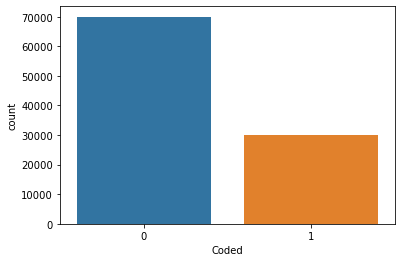

In [12]:

sbn.countplot(x = 'Coded', data = training_df)


<b>Aggregate</b> testing data by patient id and date

In [13]:

tdf = testing_df.groupby(['patient_id','date_ord'], as_index = False).mean()

In [14]:
tdf.head()

,patient_id,date_ord,heart_rate,respiration_over_impedence,spirometry_oxygen_saturation,pulse,blood_pressure_systolic,blood_pressure_diastolic,blood_pressure_average,Coded
0,20145,737428,85.142857,22.357143,95.091837,84.887755,115.336735,63.806122,83.959184,0.0
1,20145,737429,86.446809,25.500000,96.537234,83.872340,114.962766,63.856383,83.925532,0.0
2,27624,737427,56.237918,16.241636,99.732342,59.085502,158.795539,89.438662,111.204461,0.0
3,27624,737428,65.853333,14.280000,99.792000,65.706667,159.642667,89.786667,111.085333,0.0
4,27624,737429,59.052632,13.033241,99.822715,59.116343,159.775623,89.858726,111.590028,0.0


# Model building
In this step we will divide the data into test and train data to create the data model.

In [15]:
#training_df.info()
trdf = training_df
trdf = trdf.drop('date', axis = 1)
trdf = trdf.drop('new_date', axis = 1)
trdf = trdf[['patient_id','date_ord','heart_rate','respiration_over_impedence','spirometry_oxygen_saturation','pulse','blood_pressure_systolic'
            ,'blood_pressure_diastolic','blood_pressure_average','Coded']]
trdf.info()
tdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column                        Non-Null Count   Dtype
---  ------                        --------------   -----
 0   patient_id                    100000 non-null  int64
 1   date_ord                      100000 non-null  int64
 2   heart_rate                    100000 non-null  int64
 3   respiration_over_impedence    100000 non-null  int64
 4   spirometry_oxygen_saturation  100000 non-null  int64
 5   pulse                         100000 non-null  int64
 6   blood_pressure_systolic       100000 non-null  int64
 7   blood_pressure_diastolic      100000 non-null  int64
 8   blood_pressure_average        100000 non-null  int64
 9   Coded                         100000 non-null  int64
dtypes: int64(10)
memory usage: 7.6 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 351 entries, 0 to 350
Data columns (total 10 columns):
 #   Column                        Non-Null Count 

In [16]:
X_train = trdf.iloc[:,0:9]
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                        Non-Null Count   Dtype
---  ------                        --------------   -----
 0   patient_id                    100000 non-null  int64
 1   date_ord                      100000 non-null  int64
 2   heart_rate                    100000 non-null  int64
 3   respiration_over_impedence    100000 non-null  int64
 4   spirometry_oxygen_saturation  100000 non-null  int64
 5   pulse                         100000 non-null  int64
 6   blood_pressure_systolic       100000 non-null  int64
 7   blood_pressure_diastolic      100000 non-null  int64
 8   blood_pressure_average        100000 non-null  int64
dtypes: int64(9)
memory usage: 6.9 MB


In [17]:
y_train = trdf.iloc[:,9:10]
y_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   Coded   100000 non-null  int64
dtypes: int64(1)
memory usage: 781.3 KB


In [18]:
X_test = tdf.iloc[:,0:9]
X_test.info()
len(X_test)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 351 entries, 0 to 350
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   patient_id                    351 non-null    int64  
 1   date_ord                      351 non-null    int64  
 2   heart_rate                    351 non-null    float64
 3   respiration_over_impedence    351 non-null    float64
 4   spirometry_oxygen_saturation  351 non-null    float64
 5   pulse                         351 non-null    float64
 6   blood_pressure_systolic       351 non-null    float64
 7   blood_pressure_diastolic      351 non-null    float64
 8   blood_pressure_average        351 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 27.4 KB


351

In [19]:
y_test = tdf.iloc[:,9:10]
y_test.info()
len(y_test)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 351 entries, 0 to 350
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Coded   351 non-null    float64
dtypes: float64(1)
memory usage: 5.5 KB


351

In [20]:
combined_data = trdf.append(tdf)
f_data = combined_data.iloc[:,0:9]

In [21]:
t_data = combined_data.iloc[:,9:10]

In [22]:
len(f_data)

100351

In [23]:
len(t_data)

100351

# Classification
First we will use the decision tress classifier

This classifier creates a decision tree based on which, it assigns the class values to each data point. Here, we can vary the maximum number of features to be considered while creating the model. 

In [24]:
#from sklearn import tree
#clf = tree.DecisionTreeClassifier()
 
dtc = DecisionTreeClassifier()
fit = dtc.fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(dtc.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(dtc.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.59


In [25]:
clf = DecisionTreeClassifier()

In [26]:
y_pre = fit.predict(X_test) 
y_pre

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [27]:
y_pre.shape

(351,)

In [28]:
cm = confusion_matrix(y_test, y_pre)
print (cm)

[[191 135]
 [ 10  15]]


In [29]:
print (classification_report(y_test,y_pre))

              precision    recall  f1-score   support

         0.0       0.95      0.59      0.72       326
         1.0       0.10      0.60      0.17        25

    accuracy                           0.59       351
   macro avg       0.53      0.59      0.45       351
weighted avg       0.89      0.59      0.69       351



In [30]:
kf = KFold(n_splits=5,random_state=4)
for train_index, test_index in kf.split(f_data):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train_1, X_test_1 = f_data.iloc[train_index], f_data.iloc[test_index]
    y_train_1, y_test_1 = t_data.iloc[train_index], t_data.iloc[test_index]

C:\Users\nithy_sku7r2v\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


TRAIN: [ 20071  20072  20073 ... 100348 100349 100350] TEST: [    0     1     2 ... 20068 20069 20070]
TRAIN: [     0      1      2 ... 100348 100349 100350] TEST: [20071 20072 20073 ... 40138 40139 40140]
TRAIN: [     0      1      2 ... 100348 100349 100350] TEST: [40141 40142 40143 ... 60208 60209 60210]
TRAIN: [     0      1      2 ... 100348 100349 100350] TEST: [60211 60212 60213 ... 80278 80279 80280]
TRAIN: [    0     1     2 ... 80278 80279 80280] TEST: [ 80281  80282  80283 ... 100348 100349 100350]


In [31]:
for k, (train_index, test_index) in enumerate(kf.split(f_data)): 
    X_train_1, X_test_1 = f_data.iloc[train_index], f_data.iloc[test_index] 
    y_train_1, y_test_1 = t_data.iloc[train_index], t_data.iloc[test_index] 
    clf.fit(X_train_1, y_train_1) 
    print ("[fold {0}] score: {1:.5f}".format(k, clf.score(X_test_1, y_test_1)))

[fold 0] score: 0.06686
[fold 1] score: 0.65247
[fold 2] score: 0.75117
[fold 3] score: 0.48600
[fold 4] score: 0.14489


In [32]:
training_feature_names = list(f_data.columns)
training_target_names_object = training_df['Coded'].apply(lambda x: "C" if x == 1 else "NC").unique()
training_target_names = list(training_target_names_object)

In [33]:
clf_1 = DecisionTreeClassifier(criterion='entropy')

In [34]:
clf_1

DecisionTreeClassifier(criterion='entropy')

In [35]:
fit_1 = clf_1.fit(X_train, y_train)

In [36]:
y_pre_1 = fit_1.predict(X_test)   
y_pre_1
y_pre_1.shape

(351,)

In [37]:
cm_1 = confusion_matrix(y_test, y_pre_1)
print (cm)

[[191 135]
 [ 10  15]]


In [38]:
print (classification_report(y_test,y_pre_1))

              precision    recall  f1-score   support

         0.0       0.92      0.87      0.90       326
         1.0       0.00      0.00      0.00        25

    accuracy                           0.81       351
   macro avg       0.46      0.44      0.45       351
weighted avg       0.85      0.81      0.83       351



In [39]:
for k, (train_index, test_index) in enumerate(kf.split(f_data)): 
    X_train_1, X_test_1 = f_data.iloc[train_index], f_data.iloc[test_index] 
    y_train_1, y_test_1 = t_data.iloc[train_index], t_data.iloc[test_index] 
    clf_1.fit(X_train_1, y_train_1) 
    print ("[fold {0}] score: {1:.5f}".format(k, clf_1.score(X_test_1, y_test_1)))

[fold 0] score: 0.05555
[fold 1] score: 0.64011
[fold 2] score: 0.75790
[fold 3] score: 0.48445
[fold 4] score: 0.17070


# k nearest neighbours algorithm

This classifier looks for the classes of K nearest neighbors of a given data point and based on the majority class, it assigns a class to this data point. However, the number of neighbors can be varied. 

In [40]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(f_data, t_data, test_size=0.4, random_state=0)

In [41]:
X_train1.shape

(60210, 9)

In [42]:
y_train1.shape

(60210, 1)

In [43]:
X_test1.shape


(40141, 9)

In [44]:
y_test1.shape

(40141, 1)

In [45]:
print ("[Train/test split] score: {:.5f}".format(clf.score(X_test1, y_test1)))

[Train/test split] score: 0.82915


In [46]:
for x in range(1,6):
    clf = KNeighborsClassifier(x)
    clf.fit(X_train1, y_train1)
    predicted = clf.predict(X_test1)
    accuracy = metrics.accuracy_score(predicted,y_test1)
    cm = confusion_matrix(y_test1,predicted)
    print ("\nk = "+ str(x))
    print ("Confusion matrix:\n", cm)
    print (classification_report(y_test1, predicted)+"\n")
    print("Accuracy for kNN : %s" % "{0:.3%}".format(accuracy))

<ipython-input-46-bdec0f7c2924>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  clf.fit(X_train1, y_train1)



k = 1
Confusion matrix:
 [[27249   878]
 [  515 11499]]
              precision    recall  f1-score   support

         0.0       0.98      0.97      0.98     28127
         1.0       0.93      0.96      0.94     12014

    accuracy                           0.97     40141
   macro avg       0.96      0.96      0.96     40141
weighted avg       0.97      0.97      0.97     40141


Accuracy for kNN : 96.530%


<ipython-input-46-bdec0f7c2924>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  clf.fit(X_train1, y_train1)



k = 2
Confusion matrix:
 [[27558   569]
 [ 1061 10953]]
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97     28127
         1.0       0.95      0.91      0.93     12014

    accuracy                           0.96     40141
   macro avg       0.96      0.95      0.95     40141
weighted avg       0.96      0.96      0.96     40141


Accuracy for kNN : 95.939%


<ipython-input-46-bdec0f7c2924>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  clf.fit(X_train1, y_train1)



k = 3
Confusion matrix:
 [[27075  1052]
 [  650 11364]]
              precision    recall  f1-score   support

         0.0       0.98      0.96      0.97     28127
         1.0       0.92      0.95      0.93     12014

    accuracy                           0.96     40141
   macro avg       0.95      0.95      0.95     40141
weighted avg       0.96      0.96      0.96     40141


Accuracy for kNN : 95.760%


<ipython-input-46-bdec0f7c2924>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  clf.fit(X_train1, y_train1)



k = 4
Confusion matrix:
 [[27361   766]
 [ 1071 10943]]
              precision    recall  f1-score   support

         0.0       0.96      0.97      0.97     28127
         1.0       0.93      0.91      0.92     12014

    accuracy                           0.95     40141
   macro avg       0.95      0.94      0.95     40141
weighted avg       0.95      0.95      0.95     40141


Accuracy for kNN : 95.424%


<ipython-input-46-bdec0f7c2924>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  clf.fit(X_train1, y_train1)



k = 5
Confusion matrix:
 [[26975  1152]
 [  822 11192]]
              precision    recall  f1-score   support

         0.0       0.97      0.96      0.96     28127
         1.0       0.91      0.93      0.92     12014

    accuracy                           0.95     40141
   macro avg       0.94      0.95      0.94     40141
weighted avg       0.95      0.95      0.95     40141


Accuracy for kNN : 95.082%


We notice that for k=4, the accuracy and the precision is highest. Let us check the results with cross fold validation

In [47]:

clf = KNeighborsClassifier(4)
clf.fit(X_train1, y_train1)
predicted = clf.predict(X_test1)
predicted.shape

<ipython-input-47-adcf42d2f716>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  clf.fit(X_train1, y_train1)


(40141,)

In [48]:
for k, (train_index, test_index) in enumerate(kf.split(f_data)): 
    X_train_1, X_test_1 = f_data.iloc[train_index], f_data.iloc[test_index] 
    y_train_1, y_test_1 = t_data.iloc[train_index], t_data.iloc[test_index] 
    clf.fit(X_train, y_train) 
    print ("[fold {0}] score: {1:.5f}".format(k, clf.score(X_test_1, y_test_1)))

<ipython-input-48-0881bcc79274>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  clf.fit(X_train, y_train)


[fold 0] score: 0.97808


<ipython-input-48-0881bcc79274>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  clf.fit(X_train, y_train)


[fold 1] score: 0.99417


<ipython-input-48-0881bcc79274>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  clf.fit(X_train, y_train)


[fold 2] score: 0.99402


<ipython-input-48-0881bcc79274>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  clf.fit(X_train, y_train)


[fold 3] score: 0.96442


<ipython-input-48-0881bcc79274>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  clf.fit(X_train, y_train)


[fold 4] score: 0.96487


# Naive Bayes Classifier

In [49]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(f_data, t_data, test_size=0.4, random_state=0)
clf = GaussianNB()
clf.fit(X_train2, y_train2)
prediction_nb = clf.predict(X_test2)

C:\Users\nithy_sku7r2v\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [50]:
prediction_nb.shape

(40141,)

In [51]:
cm = confusion_matrix(y_test2,prediction_nb)
print (cm)

[[25648  2479]
 [ 9128  2886]]


In [52]:
print (classification_report(y_test2, prediction_nb))

              precision    recall  f1-score   support

         0.0       0.74      0.91      0.82     28127
         1.0       0.54      0.24      0.33     12014

    accuracy                           0.71     40141
   macro avg       0.64      0.58      0.57     40141
weighted avg       0.68      0.71      0.67     40141



In [53]:
accuracy = metrics.accuracy_score(prediction_nb,y_test2)
print("Accuracy for Naive Bayes : %s" % "{0:.3%}".format(accuracy))

Accuracy for Naive Bayes : 71.084%


In [54]:
for k, (train_index, test_index) in enumerate(kf.split(f_data)): 
    X_train_1, X_test_1 = f_data.iloc[train_index], f_data.iloc[test_index] 
    y_train_1, y_test_1 = t_data.iloc[train_index], t_data.iloc[test_index] 
    clf.fit(X_train_1, y_train_1) 
    print ("[fold {0}] score: {1:.5f}".format(k, clf.score(X_test_1, y_test_1)))

C:\Users\nithy_sku7r2v\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[fold 0] score: 0.85252


C:\Users\nithy_sku7r2v\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[fold 1] score: 0.83832


C:\Users\nithy_sku7r2v\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[fold 2] score: 0.98724


C:\Users\nithy_sku7r2v\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[fold 3] score: 0.49123


C:\Users\nithy_sku7r2v\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[fold 4] score: 0.12466


<b>Accuracy of KNN<b/>

In [55]:
accuracy = metrics.accuracy_score(predicted,y_test1)
print("Accuracy for kNN : %s" % "{0:.3%}".format(accuracy))

Accuracy for kNN : 95.424%


<b>Accuracy of Decission Trees- Gini & Entropy</b>

In [56]:
accuracy = metrics.accuracy_score(y_pre,y_test)
print("Accuracy for Decision Tree : %s" % "{0:.3%}".format(accuracy))

Accuracy for Decision Tree : 58.689%


In [57]:
accuracy = metrics.accuracy_score(y_pre_1,y_test)
print("Accuracy for Decision Tree : %s" % "{0:.3%}".format(accuracy))

Accuracy for Decision Tree : 81.197%


<b>Accuracy of Naive Bayes</b>

In [58]:
accuracy = metrics.accuracy_score(prediction_nb,y_test2)
print("Accuracy for Naive Bayes : %s" % "{0:.3%}".format(accuracy))

Accuracy for Naive Bayes : 71.084%


# Conclusion
After analysis predictive models Naive Bayes, KNN and Decision tree for this give data, the accuracy of the <b>K nearest neighbours algorithm is best btoh because of its accuracy and the K fold Validation.</b>

Accuracy of the K nearest neighbours algorithm is  <b>95.424%</b>

This model can then be used as a simple predicting tool and all that we need to do is to input ones: pulse,systolic and diastolic blood pressures, heart rate and blood glucose levels after which the model can be run and it outputs a prediction.